<a href="https://colab.research.google.com/github/ViniitMe/Machine-Learning-foundation-and-Applications/blob/master/KNN_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 | Vinit Kumar

In [0]:
import pandas as pd
import numpy as np
import keras
from keras import datasets
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train[0:1000]
y_train = y_train[0:1000]
x_test = x_test[0:100]
y_test = y_test[0:100]

In [0]:
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))


x_train shape: (1000, 28, 28)
y_train shape: (1000,)
x_test shape: (100, 28, 28)
y_test shape: (100,)


label:1


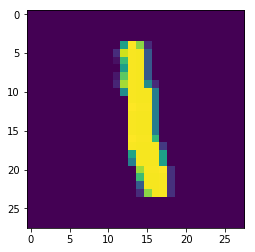

In [0]:
plt.imshow(x_train[6])
print("label:" + str(y_train[6]))

In [0]:
# flattening into 1D vector
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [0]:
x_train[0].shape

(784,)

In [0]:
def euclideanDistance(point1, point2, length):
  distance = 0
  for x in range(length):
    distance = distance + np.square(point1[x]-point2[x])
  return np.sqrt(distance)

In [0]:
def KNN(training_set, labels, test_instance, K):
  distance = []
  for i in range(len(training_set)):
    dist = euclideanDistance(training_set[i], test_instance, 784)
    distance.append((dist, labels[i]))
  distance.sort(key=lambda x:x[0])
  neighbors = distance[:K]
  
  vote = {}
  for i in range(len(neighbors)):
    response = neighbors[i][1]
    if response in vote:
      vote[response] += 1
    else:
      vote[response] = 1
  sortedVote = sorted(vote.items(), key=lambda x:x[1], reverse=True )
  return sortedVote[0][0]

In [0]:
y_pred = np.zeros(100)
for i in range(x_test.shape[0]):
  neighbor = KNN(x_train, y_train, x_test[i], 5)
  y_pred[i] = neighbor

In [0]:
accuracy_score(y_test, y_pred)
# Accuracy obtained = 0.85

0.85

In [0]:
#Cross checking
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

In [0]:
K = [5, 7, 10, 15, 20, 25, 50]
acc = []
for i in range(len(K)):
  clf = KNeighborsClassifier(n_neighbors=K[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  acc.append(accuracy_score(y_test, y_pred))

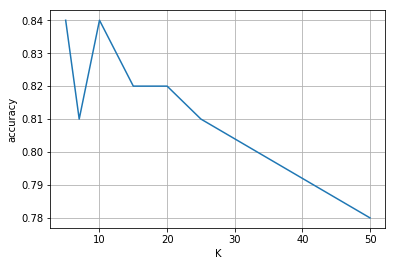

In [0]:
# Plotting accuracy vs K value
plt.plot(K, acc)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [0]:
# Confusion Matrix for K = 10
from sklearn.metrics import confusion_matrix as cMat
results = cMat(y_test, y_pred)
print(results)

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  4  0  1  0  0  1  0  0]
 [ 0  1  0  9  0  0  0  0  0  1]
 [ 0  0  0  0 12  0  0  0  0  2]
 [ 0  2  0  0  2  3  0  0  0  0]
 [ 0  3  1  0  0  0  6  0  0  0]
 [ 0  1  0  0  0  0  0 12  0  2]
 [ 0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0  9]]


#Part 2

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data = pd.read_csv("/content/drive/My Drive/15MI33017/dataset.csv")

In [0]:
print(data.head())
print(data.shape)
print(data.info())

   Unnamed: 0                                               data  flag
0           0  court agrees to expedite n.f.l.'s appeal the d...     0
1           1  no tsunami but fifa's corruption storm rages o...     0
2           2  chung backs bin hammam in fifa presidential ra...     0
3           3  rory mcilroy hangs on to slim lead at augusta ...     0
4           4  figure skating: south korean skater stumbles, ...     0
(151, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
Unnamed: 0    151 non-null int64
data          151 non-null object
flag          151 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.6+ KB
None


In [0]:
text = data['data']
label = data['flag']

In [0]:
text.head()

0    court agrees to expedite n.f.l.'s appeal the d...
1    no tsunami but fifa's corruption storm rages o...
2    chung backs bin hammam in fifa presidential ra...
3    rory mcilroy hangs on to slim lead at augusta ...
4    figure skating: south korean skater stumbles, ...
Name: data, dtype: object

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
myset = set()
def build_vocab(sentences):
  sentences = sentences.replace('[^\w\s]','')
  tokens = sentences.split()
  tokens = [w.lower() for w in tokens]
  tokens = [w for w in tokens if w not in stop]
  for i in range(len(tokens)):
    myset.add(tokens[i])
  return myset

In [0]:
for i in range(text.shape[0]):
  myset = build_vocab(text[i])

In [0]:
# Vocabulary size
len(myset)
vocab_list = list(myset)

In [0]:
tokens = text[5].split()
x = np.zeros(len(myset))
result  = defaultdict(int)
for i in range(len(l)):
  if(l[i] in tokens):
    count = tokens.count(l[i])
    result[i] = count

In [0]:
len(vocab_list)

2139

In [0]:
def processing(sentences):
  sentences = sentences.replace('[^\w\s]','')
  tokens = sentences.split()
  tokens = [w.lower() for w in tokens]
  tokens = [w for w in tokens if w not in stop]
  
  result = defaultdict(int)
  for word in vocab_list:
    count = tokens.count(word)
    result[word] = count
  x = list(result.values())
  return x;

In [0]:
for i in range(text.shape[0]):
  text[i] = processing(text[i])
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
label.shape

(151,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(text, label, test_size=0.3)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print(x_train.shape)
print(x_test.shape)

(105,)
(46,)


In [0]:
def euclideanDistance(point1, point2, length):
  distance = 0
  for x in range(length):
    distance = distance + np.square(point1[x]-point2[x])
  return np.sqrt(distance)

def KNN(training_set, labels, test_instance, K):
  distance = []
  for i in range(len(training_set)):
    dist = euclideanDistance(training_set[i], test_instance, len(vocab_list))
    distance.append((dist, labels[i]))
  distance.sort(key=lambda x:x[0])
  neighbors = distance[:K]
  
  vote = {}
  for i in range(len(neighbors)):
    response = neighbors[i][1]
    if response in vote:
      vote[response] += 1
    else:
      vote[response] = 1
  sortedVote = sorted(vote.items(), key=lambda x:x[1], reverse=True )
  return sortedVote[0][0]

In [0]:
y_pred = np.zeros(46)
for i in range(x_test.shape[0]):
  neighbor = KNN(x_train, y_train, x_test[i], 5)
  y_pred[i] = neighbor

In [0]:
accuracy_score(y_test, y_pred)

0.7391304347826086

In [0]:
# Accuracy_obtained: 0.7391